In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt

BASE_DIR = Path().resolve().parent
FIG_OUT_DIR = BASE_DIR / "presentation" / "figures"
FIG_DATA_DIR = BASE_DIR / "presentation" / "data"


In [39]:
def open_json(filepath):
    with open(filepath, "r") as f:
        data = json.load(f)
    return data


sig_peak_json = FIG_DATA_DIR / "20220201_perc_peaks_identified_1330_0.json"
data = open_json(sig_peak_json)

exp_rt, exp_id, mz_perc, mz_rt_perc, mz_rt_im_perc = zip(*[d.values() for d in data])
data[0]


{'rt': 2400.240718,
 'exp_id': 'frame=22786_scan=452',
 'mz_perc_identified': 0.7641719472512416,
 'mz_perc_rt_identified': 0.2586915567734201,
 'mz_perc_rt_im_identified': 0.11979791060113033}

In [40]:
exp_id[mz_perc.index(max(mz_perc))]


'frame=25523_scan=452'

In [41]:
def plot_2_lines(
    x_axis, first, second, x_axis_label, y_axis_label, first_label, second_label, title
):
    fig = plt.figure()
    plt.plot(x_axis, first, label=first_label)
    plt.plot(x_axis, second, label=second_label)

    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    return fig


def plot_3_lines(
    first_x_axis,
    first,
    second_x_axis,
    second,
    third_x_axis,
    third,
    x_axis_label,
    y_axis_label,
    first_label,
    second_label,
    third_label,
    title,
):
    fig = plt.figure()
    plt.plot(first_x_axis, first, label=first_label)
    plt.plot(second_x_axis, second, label=second_label)
    plt.plot(third_x_axis, third, label=third_label)

    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    return fig


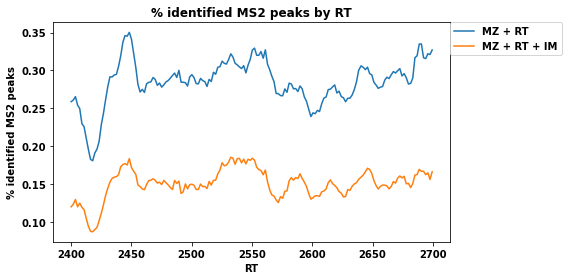

In [42]:
fig = plot_2_lines(
    exp_rt,
    mz_rt_perc,
    mz_rt_im_perc,
    "RT",
    "% identified MS2 peaks",
    "MZ + RT",
    "MZ + RT + IM",
    "% identified MS2 peaks by RT",
)

fig.set_size_inches(8, 4)
fig.tight_layout()
# Change values here..
plt.savefig(FIG_OUT_DIR / "20220201_Total_RT_2_way_lineplot.png", dpi=100)
plt.show()


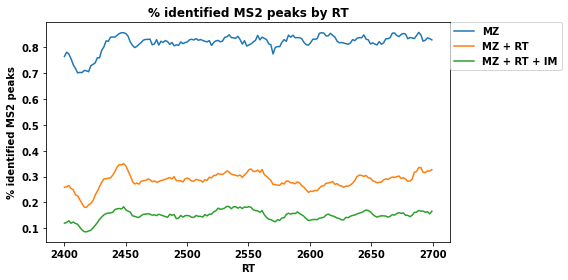

In [43]:
fig = plot_3_lines(
    exp_rt,
    mz_perc,
    exp_rt,
    mz_rt_perc,
    exp_rt,
    mz_rt_im_perc,
    "RT",
    "% identified MS2 peaks",
    "MZ",
    "MZ + RT",
    "MZ + RT + IM",
    "% identified MS2 peaks by RT",
)

fig.set_size_inches(8, 4)
fig.tight_layout()
# Change values here..
plt.savefig(FIG_OUT_DIR / "20220201_Total_RT_3_way_lineplot.png", dpi=100)
plt.show()


### Look at intensities between sig and non-sig peaks

Isolate most - mid - and least peak found data and plot -- if not, take min max

In [37]:
# Load intensity data from found and non-found peaks
def get_found_and_nonfound_int_10_150(filename):
    found_unfound_intensity_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_intensity_json)
    found_int_10_150 = list(map(float, data["found_intensity_perc_range_10_150"]))
    nonfound_int_10_150 = list(map(float, data["nonfound_intensity_perc_range_10_150"]))
    return found_int_10_150, nonfound_int_10_150


# Load intensity window data from found and non-found peaks
def get_window_found_and_nonfound_int_10_150(filename):
    found_unfound_intensity_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_intensity_json)
    rt_window = list(map(float, data["intensity_window_range_10_150"]))
    perc_found_in_rt_window = list(map(float, data["perc_found_intensity_range_10_150"]))
    return rt_window, perc_found_in_rt_window


# Change values here..
found_int_10_150, nonfound_int_10_150 = get_found_and_nonfound_int_10_150(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_intensity.json"
)
rt_mz_window, perc_found_in_rt_mz_window = get_window_found_and_nonfound_int_10_150(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_intensity_window.json"
)
rt_mz_rt_window, perc_found_in_rt_mz_rt_window = get_window_found_and_nonfound_int_10_150(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_intensity_window.json"
)
rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window = get_window_found_and_nonfound_int_10_150(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_intensity_window.json"
)


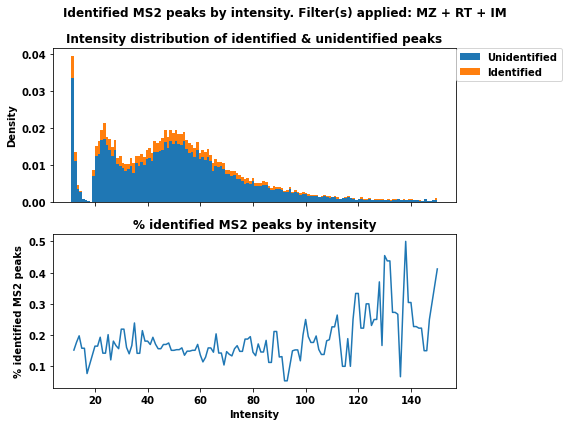

In [38]:
# FOR PLOTTING INTENSITIES

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(8, 6)
# Change values here..
fig.suptitle("Identified MS2 peaks by intensity. Filter(s) applied: MZ + RT + IM")

ax1.hist(
    [nonfound_int_10_150, found_int_10_150],
    label=["Unidentified", "Identified"],
    stacked=True,
    density=True,
    bins=138,
)
ax1.set_title("Intensity distribution of identified & unidentified peaks")
ax1.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
ax1.set(ylabel="Density")

# Change values here..
ax2.plot(rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window, label="Found")
ax2.set_title("% identified MS2 peaks by intensity")
# ax2.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax2.set(xlabel="Intensity", ylabel="% identified MS2 peaks")

fig.tight_layout()
# Change values here..
plt.savefig(
    FIG_OUT_DIR / "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_intensity.png", dpi=100
)
plt.show()


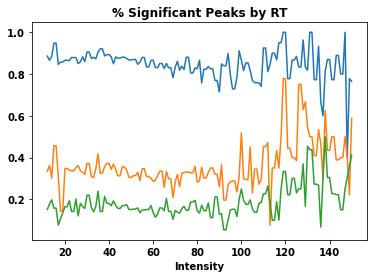

In [44]:
plt.plot(rt_mz_window, perc_found_in_rt_mz_window)
plt.plot(rt_mz_rt_window, perc_found_in_rt_mz_rt_window)
plt.plot(rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window)
plt.title("% Significant Peaks by RT")
plt.xlabel("Intensity")
plt.show()


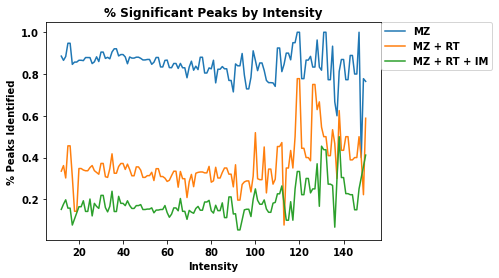

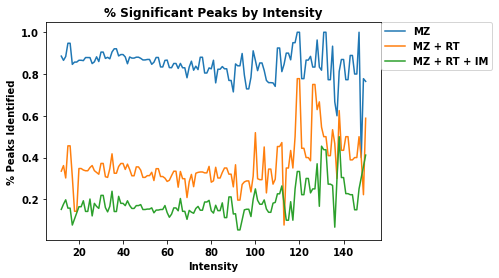

In [45]:
plot_3_lines(
    rt_mz_window,
    perc_found_in_rt_mz_window,
    rt_mz_rt_window,
    perc_found_in_rt_mz_rt_window,
    rt_mz_rt_im_window,
    perc_found_in_rt_mz_rt_im_window,
    "Intensity",
    "% Peaks Identified",
    "MZ",
    "MZ + RT",
    "MZ + RT + IM",
    "% Significant Peaks by Intensity",
)


### Look at ion mobility between sig and non-sig peaks

Isolate most - mid - and least peak found data and plot -- if not, take min max

In [61]:
# Load intensity data from found and non-found peaks
def get_found_and_nonfound_im(filename):
    found_unfound_im_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_im_json)
    found_im = list(map(float, data["found_ion_mobility_perc"]))
    nonfound_im = list(map(float, data["nonfound_ion_mobility_perc"]))
    return found_im, nonfound_im


# Load intensity window data from found and non-found peaks
def get_window_found_and_nonfound_im(filename):
    found_unfound_im_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_im_json)
    rt_window = list(map(float, data["ion_mobility_window"]))
    perc_found_in_rt_window = list(map(float, data["perc_nonfound_ion_mobility_window"]))
    return rt_window, perc_found_in_rt_window


# Change values here..
found_im, nonfound_im = get_found_and_nonfound_im(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_ion_mobility.json"
)
rt_mz_window, perc_found_in_rt_mz_window = get_window_found_and_nonfound_im(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_ion_mobility_window.json"
)
rt_mz_rt_window, perc_found_in_rt_mz_rt_window = get_window_found_and_nonfound_im(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_ion_mobility_window.json"
)
rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window = get_window_found_and_nonfound_im(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_ion_mobility_window.json"
)


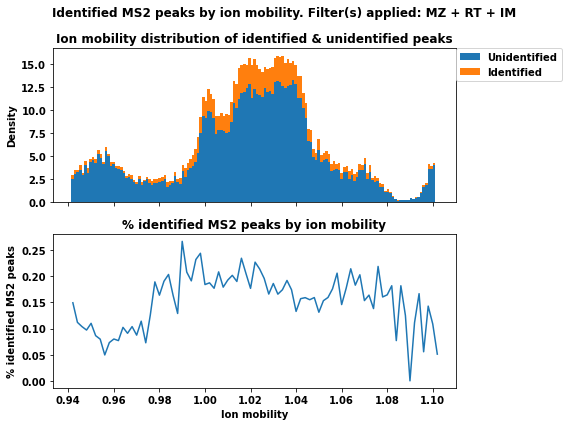

In [62]:
# FOR PLOTTING ION MOBILITY

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(8, 6)
# Change values here..
fig.suptitle("Identified MS2 peaks by ion mobility. Filter(s) applied: MZ + RT + IM")

ax1.hist(
    [nonfound_im, found_im],
    label=["Unidentified", "Identified"],
    stacked=True,
    density=True,
    bins=142,
)
ax1.set_title("Ion mobility distribution of identified & unidentified peaks")
ax1.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
ax1.set(ylabel="Density")

# Change values here..
ax2.plot(rt_mz_rt_im_window[1:], perc_found_in_rt_mz_rt_im_window[1:], label="Found")
ax2.set_title("% identified MS2 peaks by ion mobility")
# ax2.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax2.set(xlabel="Ion mobility", ylabel="% identified MS2 peaks")

fig.tight_layout()
# Change values here..
plt.savefig(
    FIG_OUT_DIR / "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_ion_mobility.png", dpi=100
)
plt.show()


### Look at mass to charge between sig and non-sig peaks

Isolate most - mid - and least peak found data and plot -- if not, take min max

In [72]:
# Load intensity data from found and non-found peaks
def get_found_and_nonfound_mz(filename):
    found_unfound_mz_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_mz_json)
    found_im = list(map(float, data["found_mass_to_charge_perc"]))
    nonfound_im = list(map(float, data["nonfound_mass_to_charge_perc"]))
    return found_im, nonfound_im


# Load intensity window data from found and non-found peaks
def get_window_found_and_nonfound_mz(filename):
    found_unfound_mz_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_mz_json)
    rt_window = list(map(float, data["mass_to_charge_window"]))
    perc_found_in_rt_window = list(map(float, data["perc_nonfound_mass_to_charge_window"]))
    return rt_window, perc_found_in_rt_window


# Change values here..
found_mz, nonfound_mz = get_found_and_nonfound_mz(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_mass_to_charge.json"
)
rt_mz_window, perc_found_in_rt_mz_window = get_window_found_and_nonfound_mz(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_mass_to_charge_window.json"
)
rt_mz_rt_window, perc_found_in_rt_mz_rt_window = get_window_found_and_nonfound_mz(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_mass_to_charge_window.json"
)
rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window = get_window_found_and_nonfound_mz(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_mass_to_charge_window.json"
)


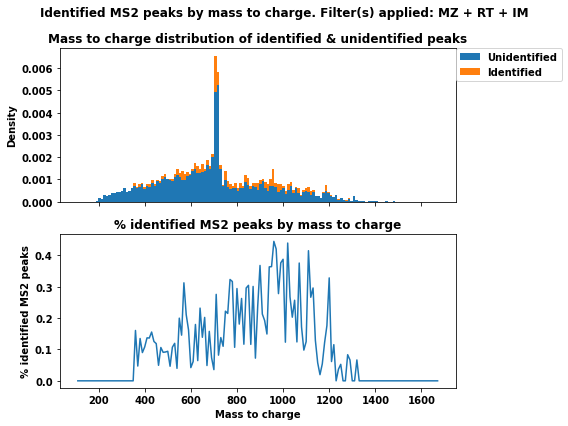

In [73]:
# FOR PLOTTING ION MOBILITY

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(8, 6)
# Change values here..
fig.suptitle("Identified MS2 peaks by mass to charge. Filter(s) applied: MZ + RT + IM")

ax1.hist(
    [nonfound_mz, found_mz],
    label=["Unidentified", "Identified"],
    stacked=True,
    density=True,
    bins=142,
)
ax1.set_title("Mass to charge distribution of identified & unidentified peaks")
ax1.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
ax1.set(ylabel="Density")

# Change values here..
ax2.plot(rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window, label="Found")
ax2.set_title("% identified MS2 peaks by mass to charge")
# ax2.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax2.set(xlabel="Mass to charge", ylabel="% identified MS2 peaks")

fig.tight_layout()
# Change values here..
plt.savefig(
    FIG_OUT_DIR / "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_mass_to_charge.png", dpi=100
)
plt.show()
